In [ ]:
import pandas as pd
import numpy as np
from keras import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
df= pd.read_csv("spam.csv", encoding = "ISO-8859-1")

**Preprocessing**

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

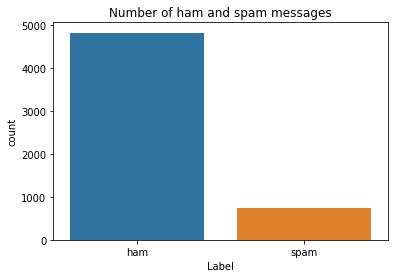

In [ ]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [ ]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [14]:
from keras_preprocessing.sequence import pad_sequences
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [15]:
sequences_matrix.shape

(4736, 150)

In [16]:
sequences_matrix.ndim

2

In [17]:
sequences_matrix = np.reshape(sequences_matrix,(4736,150,1))

In [18]:
sequences_matrix.ndim 

3

**RNN Construction**

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [20]:
model = Sequential()
model.add(Embedding(max_words,50,input_length=max_len))

In [21]:
model.add(LSTM(units=64,input_shape = (sequences_matrix.shape[1],1),return_sequences=True))
model.add(LSTM(units=32,return_sequences=True))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units = 256,activation = 'relu'))
model.add(Dense(units = 1,activation = 'sigmoid'))

In [22]:
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 150, 64)           29440     
                                                                 
 lstm_1 (LSTM)               (None, 150, 32)           12416     
                                                                 
 lstm_2 (LSTM)               (None, 150, 64)           24832     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 2

**Fit on the training data**

In [23]:
M = model.fit(sequences_matrix,Y_train,batch_size=120,epochs=5,validation_split=0.22)

Epoch 1/5
31/31 [==============================] - 31s 780ms/step - loss: 0.3347 - accuracy: 0.8914 - val_loss: 0.1431 - val_accuracy: 0.9645
Epoch 2/5
31/31 [==============================] - 23s 756ms/step - loss: 0.0841 - accuracy: 0.9759 - val_loss: 0.1469 - val_accuracy: 0.9674
Epoch 3/5
31/31 [==============================] - 25s 798ms/step - loss: 0.0552 - accuracy: 0.9851 - val_loss: 0.1087 - val_accuracy: 0.9722
Epoch 4/5
31/31 [==============================] - 24s 769ms/step - loss: 0.0348 - accuracy: 0.9884 - val_loss: 0.0959 - val_accuracy: 0.9722
Epoch 5/5
31/31 [==============================] - 26s 829ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.1082 - val_accuracy: 0.9731


**Saving the model**

In [24]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7fa98e4b7710>>

**Evaluate the model on test set data**

In [26]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [27]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 3s 69ms/step - loss: 0.1060 - accuracy: 0.9773


In [28]:
l = accr[0]
a =accr[1]
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(l,a))

Test set
  Loss: 0.106
  Accuracy: 0.977
